# YouTube Channel Statistics Dataset

Author: Vamshi Krishna

In [154]:
import pandas as pd

# # Load the dataset
df = pd.read_csv("YouTube_Channel_DataSet.csv")

pd.options.display.float_format = '{:.2f}'.format


df

,Genre,Video title,Video publish time,Views,Watch time (hours),Subscribers,Average view duration,Impressions,Impressions click-through rate (%)
0,travel,Tirupati to Srikalahasti | DAY 5&6 | Tirumala ...,8-Nov-22,170.00,5.86,0.00,0:02:04,1740,7.59
1,travel,Tirumala Trip in Sequence | DAY 2 | Tiruchaano...,16-Oct-22,115.00,8.38,2.00,0:04:22,1013,8.49
2,travel,Tirumala Trip in Sequence | DAY 1 | Telugu vl...,9-Oct-22,82.00,2.24,0.00,0:01:38,1106,5.15
3,travel,Tirumala Trip in Sequence | DAY 3 | ALIPIRI ME...,25-Oct-22,60.00,5.96,0.00,0:05:57,665,5.26
4,travel,Dakshin Express General coach experience | Se...,25-Aug-22,34.00,0.82,0.00,0:01:26,274,10.95
5,travel,Tirumala Trip in Sequence | DAY 4 | BRAHMOSTAV...,1-Nov-22,30.00,2.40,0.00,0:04:47,247,5.67
6,travel,SUNRISE at koheda gutta | The hidden gem of hy...,11-Apr-22,22.00,0.64,0.00,0:01:45,153,9.15
7,film,Nirvana | Episode - 1 | New Telugu Series 2023...,30-Apr-23,14.00,0.22,0.00,0:00:56,306,3.27
8,film,Nirvana | Episode - 3 | New Telugu Series 2023...,15-May-23,6.00,0.22,1.00,0:02:13,196,2.55
9,film,Nirvana | Episode - 2 | New Telugu Series 2023...,7-May-23,5.00,0.02,0.00,0:00:17,143,0.70


In [155]:
# 1. Handle Missing Data
# First, ensure 'Average view duration' is in a numeric format
# If it's in a time format like '0:02:04', convert it to seconds (numeric value)
def convert_to_seconds(value):
    if isinstance(value, str):  # Check if the value is a string (time format)
        try:
            # Assuming time is in the format "HH:MM:SS"
            h, m, s = map(int, value.split(':'))
            return h * 3600 + m * 60 + s
        except ValueError:
            return None  # Handle invalid time format
    elif isinstance(value, (int, float)):  # If already numeric, return the value as is
        return value
    return None  # Return None if the value is neither a string nor a number

df['Average view duration'] = df['Average view duration'].apply(convert_to_seconds)

df

,Genre,Video title,Video publish time,Views,Watch time (hours),Subscribers,Average view duration,Impressions,Impressions click-through rate (%)
0,travel,Tirupati to Srikalahasti | DAY 5&6 | Tirumala ...,8-Nov-22,170.00,5.86,0.00,124.00,1740,7.59
1,travel,Tirumala Trip in Sequence | DAY 2 | Tiruchaano...,16-Oct-22,115.00,8.38,2.00,262.00,1013,8.49
2,travel,Tirumala Trip in Sequence | DAY 1 | Telugu vl...,9-Oct-22,82.00,2.24,0.00,98.00,1106,5.15
3,travel,Tirumala Trip in Sequence | DAY 3 | ALIPIRI ME...,25-Oct-22,60.00,5.96,0.00,357.00,665,5.26
4,travel,Dakshin Express General coach experience | Se...,25-Aug-22,34.00,0.82,0.00,86.00,274,10.95
5,travel,Tirumala Trip in Sequence | DAY 4 | BRAHMOSTAV...,1-Nov-22,30.00,2.40,0.00,287.00,247,5.67
6,travel,SUNRISE at koheda gutta | The hidden gem of hy...,11-Apr-22,22.00,0.64,0.00,105.00,153,9.15
7,film,Nirvana | Episode - 1 | New Telugu Series 2023...,30-Apr-23,14.00,0.22,0.00,56.00,306,3.27
8,film,Nirvana | Episode - 3 | New Telugu Series 2023...,15-May-23,6.00,0.22,1.00,133.00,196,2.55
9,film,Nirvana | Episode - 2 | New Telugu Series 2023...,7-May-23,5.00,0.02,0.00,17.00,143,0.70


In [156]:
# 2. Fill missing values
df.fillna({
    'Views': df['Views'].mean(),
    'Watch time (hours)': df['Watch time (hours)'].median(),
    'Subscribers': df['Subscribers'].mean(),
    'Average view duration': df['Average view duration'].mean(),
}, inplace=True)

# Replace any values less than 1 in the 'Subscribers' column with 0
df['Subscribers'] = df['Subscribers'].apply(lambda x: 0 if x < 1 else x)


df

,Genre,Video title,Video publish time,Views,Watch time (hours),Subscribers,Average view duration,Impressions,Impressions click-through rate (%)
0,travel,Tirupati to Srikalahasti | DAY 5&6 | Tirumala ...,8-Nov-22,170.00,5.86,0.00,124.00,1740,7.59
1,travel,Tirumala Trip in Sequence | DAY 2 | Tiruchaano...,16-Oct-22,115.00,8.38,2.00,262.00,1013,8.49
2,travel,Tirumala Trip in Sequence | DAY 1 | Telugu vl...,9-Oct-22,82.00,2.24,0.00,98.00,1106,5.15
3,travel,Tirumala Trip in Sequence | DAY 3 | ALIPIRI ME...,25-Oct-22,60.00,5.96,0.00,357.00,665,5.26
4,travel,Dakshin Express General coach experience | Se...,25-Aug-22,34.00,0.82,0.00,86.00,274,10.95
5,travel,Tirumala Trip in Sequence | DAY 4 | BRAHMOSTAV...,1-Nov-22,30.00,2.40,0.00,287.00,247,5.67
6,travel,SUNRISE at koheda gutta | The hidden gem of hy...,11-Apr-22,22.00,0.64,0.00,105.00,153,9.15
7,film,Nirvana | Episode - 1 | New Telugu Series 2023...,30-Apr-23,14.00,0.22,0.00,56.00,306,3.27
8,film,Nirvana | Episode - 3 | New Telugu Series 2023...,15-May-23,6.00,0.22,1.00,133.00,196,2.55
9,film,Nirvana | Episode - 2 | New Telugu Series 2023...,7-May-23,5.00,0.02,0.00,17.00,143,0.70


In [157]:

print(df.isna().sum())
print("\nDuplicates: ", df.duplicated().sum(), "\n")
print(df.describe())


Genre                                 0
Video title                           0
Video publish time                    0
Views                                 0
Watch time (hours)                    0
Subscribers                           0
Average view duration                 0
Impressions                           0
Impressions click-through rate (%)    0
dtype: int64

Duplicates:  0 

       Views  Watch time (hours)  Subscribers  Average view duration  \
count  22.00               22.00        22.00                  22.00   
mean   30.89                1.28         0.14                 130.00   
std    42.61                2.35         0.47                 120.83   
min     1.00                0.00         0.00                   0.00   
25%     4.00                0.02         0.00                  21.25   
50%    18.00                0.22         0.00                 114.50   
75%    30.89                0.78         0.00                 132.25   
max   170.00                8.38 

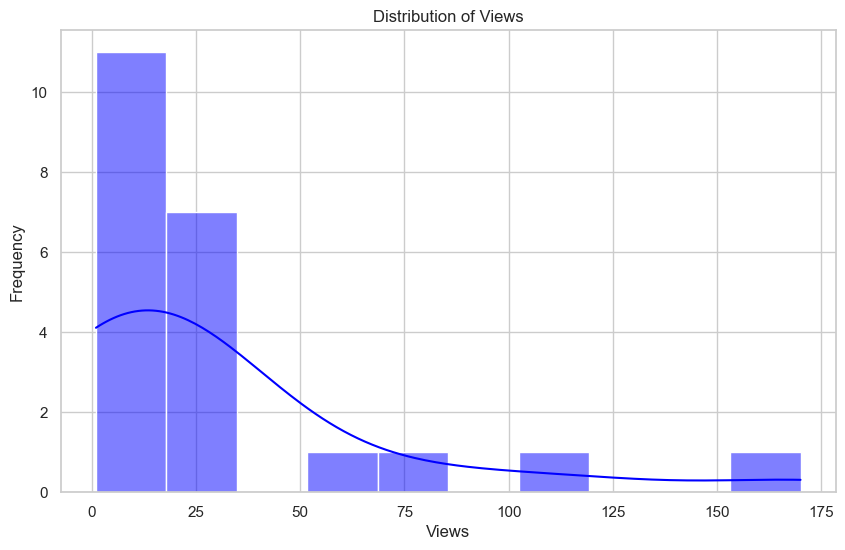

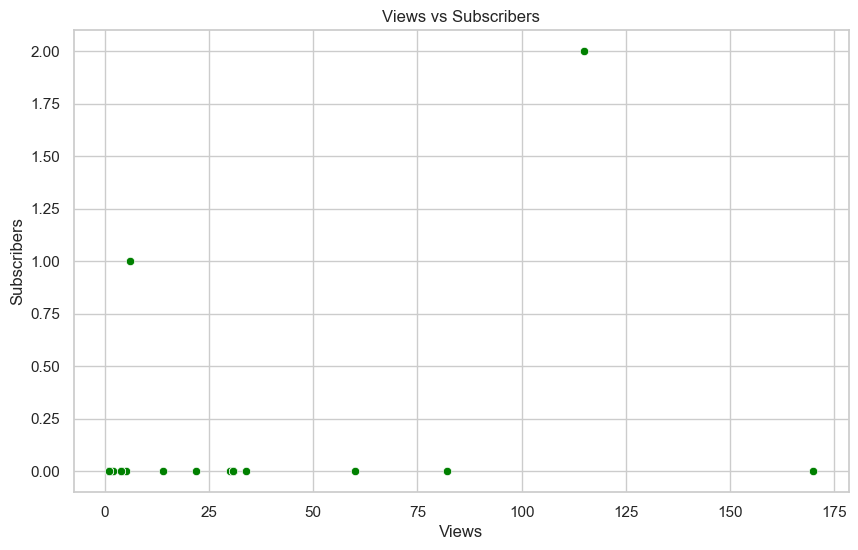

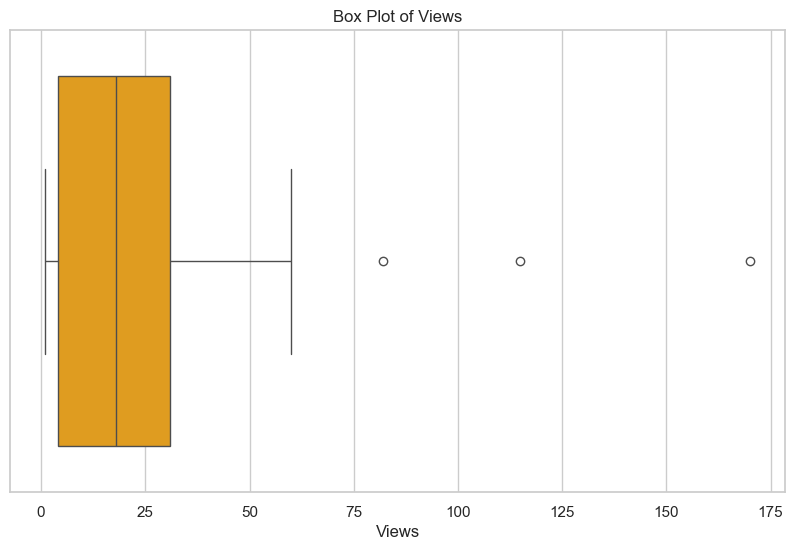

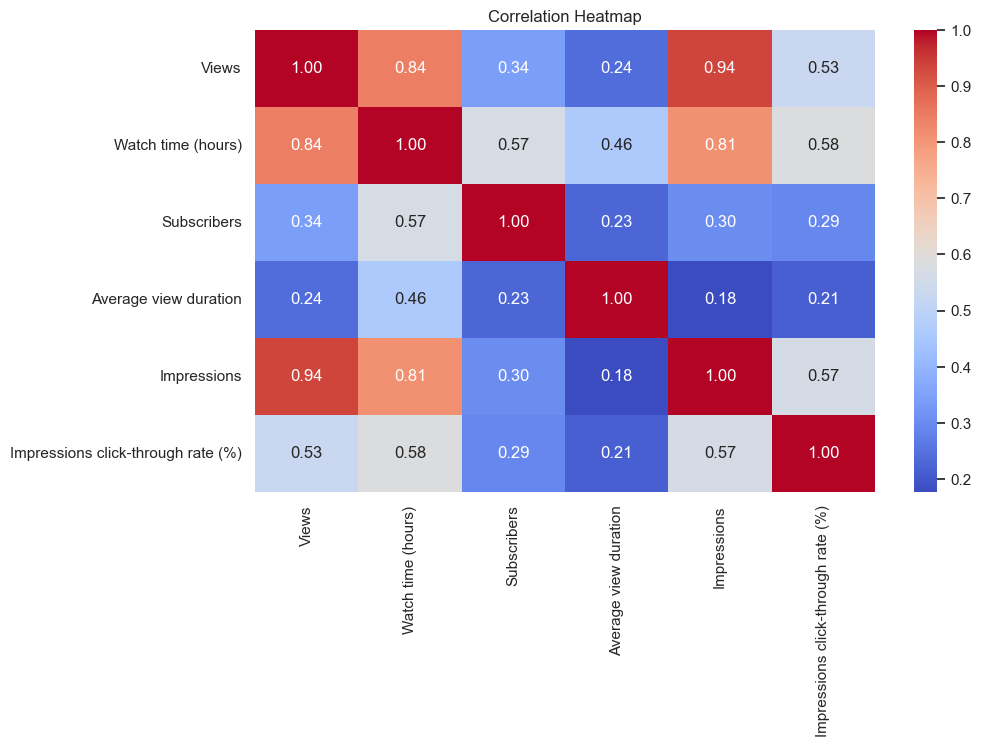

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# 1. Histogram for Views
plt.figure(figsize=(10, 6))
sns.histplot(df['Views'], kde=True, color='blue', bins=10)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot for Views vs Subscribers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Views', y='Subscribers', data=df, color='green')
plt.title('Views vs Subscribers')
plt.xlabel('Views')
plt.ylabel('Subscribers')
plt.show()

# 3. Box plot for Views
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Views'], color='orange')
plt.title('Box Plot of Views')
plt.xlabel('Views')
plt.show()

# 4. Correlation Heatmap for numerical columns
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Views', 'Watch time (hours)', 'Subscribers', 'Average view duration', 'Impressions', 'Impressions click-through rate (%)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


R-squared: 0.8641729102279475
Mean Squared Error (MSE): 675.8430002041878
Model Coefficients: [ 4.01599542e+00  5.13296641e-02 -2.95806743e-01  3.71137198e-04]
Model Intercept: 9.549605774896282


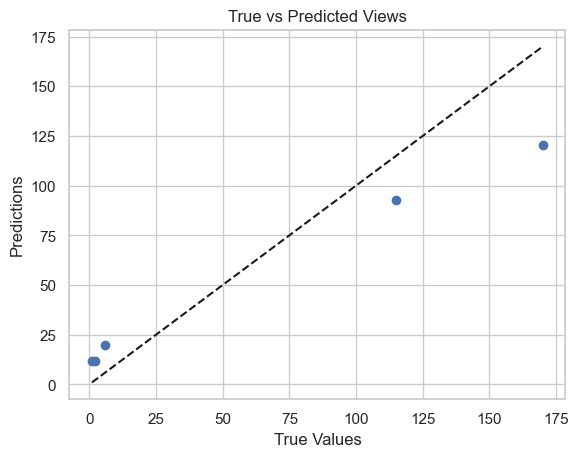

In [161]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 2: Prepare the features (X) and target (y)
X = df[['Watch time (hours)', 'Impressions', 'Impressions click-through rate (%)', 'Average view duration']]  # Features
y = df['Views']  # Target (number of views)

# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the Linear Regression model
model = LinearRegression()

# Step 5: Train the model on the training data
model.fit(X_train, y_train)

# Step 6: Make predictions using the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model using R-squared and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Step 8: Display the results
print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)

# Step 9: Display the model coefficients (feature importance)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Optional: Visualize the predictions vs actual values

plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Views')
plt.show()


# True Values (Actual Values)

These are the actual values of the target variable (in your case, the number of views) from the dataset.  
They represent the ground truth or what the model is trying to predict.  
In your dataset, these values come from the column Views.  

# Predictions 

These are the values predicted by your regression model for the target variable based on the input features (Watch time (hours), Impressions, etc.).  
The model uses the relationships it learned during training to make these predictions.  